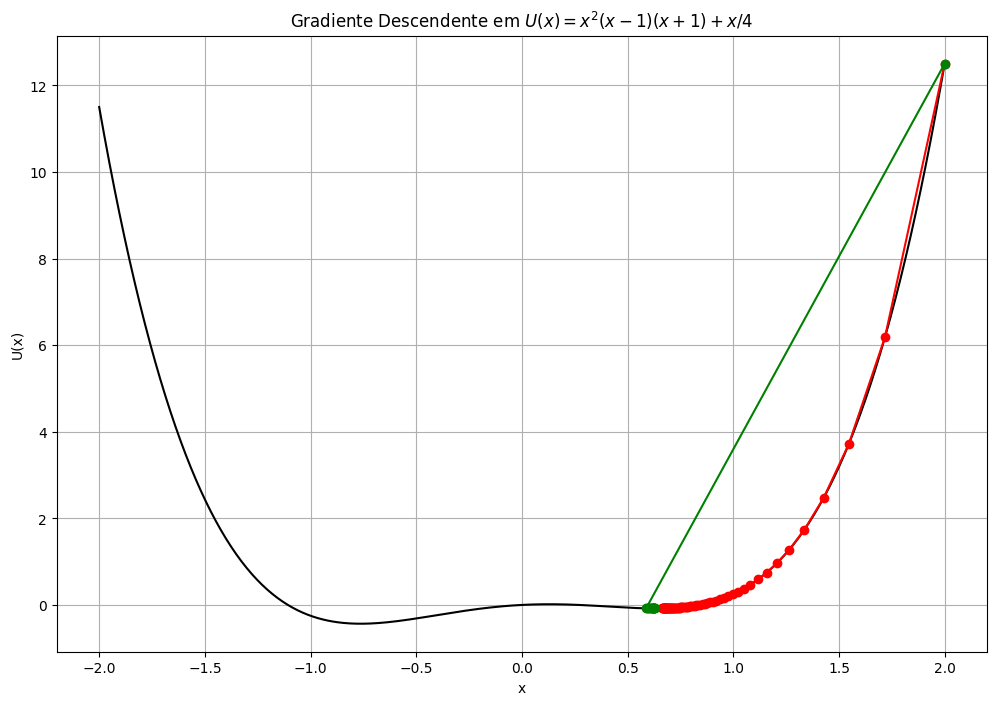

In [2]:
#Exercício 3

#Atividade 3

import numpy as np
import matplotlib.pyplot as plt

# Função modificada
def U(x):
    return x**2 * (x - 1) * (x + 1) + x / 4

# Derivada da função
def dU_dx(x):
    return 4*x**3 - 2*x + 0.25

# Algoritmo de gradiente descendente com controle de explosão
def gradient_descent(alpha, epsilon=0.001, max_iter=1000, x0=2.0):
    x = x0
    trajectory = [x]
    for _ in range(max_iter):
        grad = dU_dx(x)
        x_new = x - alpha * grad
        # Controle de explosão
        if abs(x_new) > 1e6:
            print(f"Parando, x ficou muito grande: {x_new}")
            break
        trajectory.append(x_new)
        if abs(x_new - x) < epsilon:
            break
        x = x_new
    return trajectory

# Parâmetros
alphas = [0.01, 0.05]  # Usei alphas menores para evitar overflow
colors = ['red', 'green']

# Plot da função
x_vals = np.linspace(-2, 2, 500)
y_vals = U(x_vals)

plt.figure(figsize=(12, 8))
plt.plot(x_vals, y_vals, color='black')

# Plot das trajetórias
for alpha, color in zip(alphas, colors):
    traj = np.array(gradient_descent(alpha))
    plt.plot(traj, U(traj), marker='o', linestyle='-', color=color)

plt.title('Gradiente Descendente em $U(x) = x^2(x-1)(x+1) + x/4$')
plt.xlabel('x')
plt.ylabel('U(x)')
plt.grid(True)
plt.show()
